Link: https://github.com/ultralytics/ultralytics/issues/3137

In [102]:
import cv2
import numpy as np
from PIL import Image, ImageDraw,ImageFont
import random
from matplotlib import pyplot as plt

In [103]:
import warnings
# Filter out the DeprecationWarning related to textsize in Pillow
warnings.filterwarnings("ignore", category=DeprecationWarning, module="PIL.ImageDraw")

In [104]:
# # Custom
# def cv2_imshow(image):
#     # Convert the image from BGR to RGB color space
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Create a figure and axes
#     fig, ax = plt.subplots()

#     # Display the image
#     ax.imshow(image_rgb)

#     # Remove the axis labels
#     ax.axis('off')

#     # Show the plot
#     plt.show()

In [105]:
# Google colab
# Link: https://github.com/googlecolab/colabtools/blob/main/google/colab/patches/__init__.py

import cv2
from IPython import display
import PIL


def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks.
  Args:
    a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. For
      example, a shape of (N, M, 3) is an NxM BGR color image, and a shape of
      (N, M, 4) is an NxM BGRA color image.
  """
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display.display(PIL.Image.fromarray(a))

In [106]:
image_path="./trainPart/6f9479f81b87f74aac57b613d578b663.jpg" # path of the image, change it
annotation_path="./trainPartTxtMainLabels/6f9479f81b87f74aac57b613d578b663.txt" #path of the annotation text file, change it

In [107]:
# The Helper functions below assume that the image size is (640,640).Hence resizing the image.
#Open the image
img = Image.open(image_path) 
# width, height = img.size

#Resize the image to 640 by 640
img = img.resize((1280, 1280))
#if you want then you can save the resized image by img.save('resized_image.jpg')

# <--------- Helper functions starts here ----------------------------------->
# def maskVisualize(image,mask):
#   fontsize = 20
#   f, ax = plt.subplots(1, 2, figsize=(25, 20))
#   ax[0].axis('off')
#   ax[0].imshow(image)
#   ax[1].axis('off')
#   ax[1].imshow(mask)
#   plt.show()

# overlapping
def maskVisualize(image, mask):
    fontsize = 20
    f, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    ax.imshow(image)
    ax.imshow(mask, alpha=0.9)  # Overlay the mask with transparency
    plt.show()



In [108]:
#convert the mask from the txt file(annotation_path is path of txt file) to array of points making that mask.
def generate_points(annotation_path=''):
  labels=[] # this will store labels
  #we are assuming that the image is of dimension (640,640). then you have annotated it.
  with open(annotation_path, "r") as file:
    points=[]
    for line in file:
      label,lis=line.split()[0],line.split()[1:]
      labels.append(label)
      lis=list(map(float,lis))
      for i in range(len(lis)):
        lis[i]=int(lis[i]*1280) # width should be placed
      newlis=[]
      i=0
      while(i<len(lis)):
        #appendint the coordinates as a tuple (x,y)
        newlis.append((lis[i],lis[i+1]))
        i+=2
      points.append(newlis)
    return labels,points

In [109]:
class_map = {
    "1":	"shirt, blouse", 	
    "2":	"top, t-shirt, sweatshirt", 	
    "3":	"sweater",
    "4":	"cardigan", 	
    "5":	"jacket", 	
    "6":	"vest",	
    "7":	"pants",	
    "8":	"shorts", 	
    "9":	"skirt",	
    "10":	"coat",	
    "11": 	"dress",	
    "12": 	"jumpsuit",
    "13": 	"cape",
    "14": 	"glasses",
    "15": 	"hat",
    "16": 	"headband, head covering",
    "17": 	"tie",
    "18": 	"glove",
    "19": 	"watch",
    "20": 	"belt",
    "21": 	"leg warmer", 	
    "22": 	"tights, stockings", 	
    "23": 	"sock",
    "24": 	"shoe",
    "25": 	"bag, wallet",
    "26": 	"scarf",
    "27": 	"umbrella"
}

In [110]:
color_hash = {
    '1': 'AliceBlue',
    '2': 'AntiqueWhite',
    '3': 'Aqua',
    '4': 'Aquamarine',
    '5': 'Azure',
    '6': 'Beige',
    '7': 'Bisque',
    '8': 'BlanchedAlmond',
    '9': 'Blue',
    '10': 'BlueViolet',
    '11': 'Brown',
    '12': 'BurlyWood',
    '13': 'CadetBlue',
    '14': 'Chartreuse',
    '15': 'Coral',
    '16': 'CornflowerBlue',
    '17': 'Cornsilk',
    '18': 'Crimson',
    '19': 'Cyan',
    '20': 'DarkMagenta',
    '21': 'DarkGoldenRod',
    '22': 'DarkKhaki',
    '23': 'DarkOliveGreen',
    '24': 'DarkOrange',
    '25': 'DarkSeaGreen',
    '26': 'DarkTurquoise',
    '27': 'DarkViolet',
}

colors_hexa = ["#FF0000", "#FF4500", "#FF8C00", "#FFA500", "#FFD700", "#FFFF00", "#ADFF2F",
               "#7FFF00", "#00FF00", "#32CD32", "#00FA9A", "#00FFFF", "#40E0D0", "#00CED1",
               "#00BFFF", "#1E90FF", "#4169E1", "#0000FF", "#6A5ACD", "#8A2BE2", "#9932CC",
               "#8B008B", "#EE82EE", "#FF00FF", "#DA70D6", "#FF1493", "#FF69B4", "#FFB6C1",
               "#FFC0CB", "#FFDAB9", "#FFE4B5", "#FFE4C4", "#FFDAB9", "#FFFACD", "#FAFAD2",
               "#FFF8DC", "#FFEBCD", "#FFEFD5", "#FFF5EE", "#F5F5DC", "#FAEBD7", "#F0FFF0",
               "#F0FFFF", "#F0F8FF", "#F8F8FF", "#F5F5F5"]

color_bgr = {
    "1": (255, 157, 151),
    "2": (255, 112, 31),
    "3": (255, 178, 29),
    "4": (207, 210, 49),
    "5": (72, 249, 10),
    "6": (146, 204, 23),
    "7": (61, 219, 134),
    "8": (26, 147, 52),
    "9": (0, 212, 187),
    "10": (44, 153, 168),
    "11": (0, 194, 255),
    "12": (52, 69, 147),
    "13": (100, 115, 255),
    "14": (0, 24, 236),
    "15": (132, 56, 255),
    "16": (82, 0, 133),
    "17": (203, 56, 255),
    "18": (255, 149, 200),
    "19": (255, 55, 199),
    "20": (255, 56, 56),
    "21": (255, 157, 151),
    "22": (255, 112, 31),
    "23": (255, 178, 29),
    "24": (207, 210, 49),
    "25": (72, 249, 10),
    "26": (146, 204, 23),
}

In [111]:
#the below function convert the boundary coordinates to mask array (it shows mask if you pass 1 at show)
#the mask array is required when we want to augument the mask also using albumentation
def convert_boundary_to_mask_array(labels,points, show=0):
  #Create a new image with the same size as the desired mask
  # mask = Image.new("L", (640, 640), 0)
  mask = Image.new(mode = "RGB", size = (1280, 1280), color = "#f9f9f9")
  draw = ImageDraw.Draw(mask)
  for i, boundary_coords in enumerate(points):
    #boundary_coords represent boundary of one polygon
    #Draw the boundary on the mask image
    # color = color_hash[labels[i]]
    color = color_bgr[labels[i]]
    # draw.polygon(boundary_coords,fill=colors1[i % len(colors1)])
    draw.polygon(boundary_coords, fill=color)
    #Also put the label as text 
    #Compute the centroid of the polygon
    centroid_x = sum(x for x, _ in boundary_coords) / len(boundary_coords)
    centroid_y = sum(y for _, y in boundary_coords) / len(boundary_coords)
    centroid = (int(centroid_x), int(centroid_y))
    #Write the name at the centroid
    # text = str(labels[i])
    text = str(class_map[labels[i]])
    # print(f'TEXT is {text}')
    #Write the label at the centroid
    font_size = 30  # Specify the desired font size
    font = ImageFont.truetype("arial.ttf", font_size) # use a specific font and size
    # font = ImageFont.load_default()
    # text_w, text_h = draw.textsize(text, font=font)
    text_length = draw.textlength(text, font=font)
    # text_pos = (centroid[0] - text_w/2, centroid[1] - text_h/2)
    text_pos = (centroid[0] - text_length/2, centroid[1] - text_length/2)
    draw.text(text_pos, text, font=font, fill=(255, 255, 255))
  #Convert the mask image to a numpy array
  mask_array = np.array(mask)*255
  print(f'FOUND LABELS: {labels}')
  #Show the mask image
  if(show==1):
    #Image.fromarray(mask_array).show()
    cv2_imshow(mask_array)
  return mask_array

In [112]:
#function that takes mask path (yolov8 seg txt file) and return mask of an image (shape of mask == shape of image)
def generate_mask(annotation_path='',show=0):
  #pass show=1 for showing the generated mask
  #firstly we generate the points (coordinates) from the annotations
  labels,points=generate_points(annotation_path)
  #once we get the points we will now generate the mask image from these points (binary mask image (black/white))
  #mask is represented by white and ground is represented as black
  mask_array=convert_boundary_to_mask_array(labels,points,show)
  return mask_array
# <---------- Helper Functions Ends here ------------------------------------------------------------->

FOUND LABELS: ['2', '7', '19', '20']


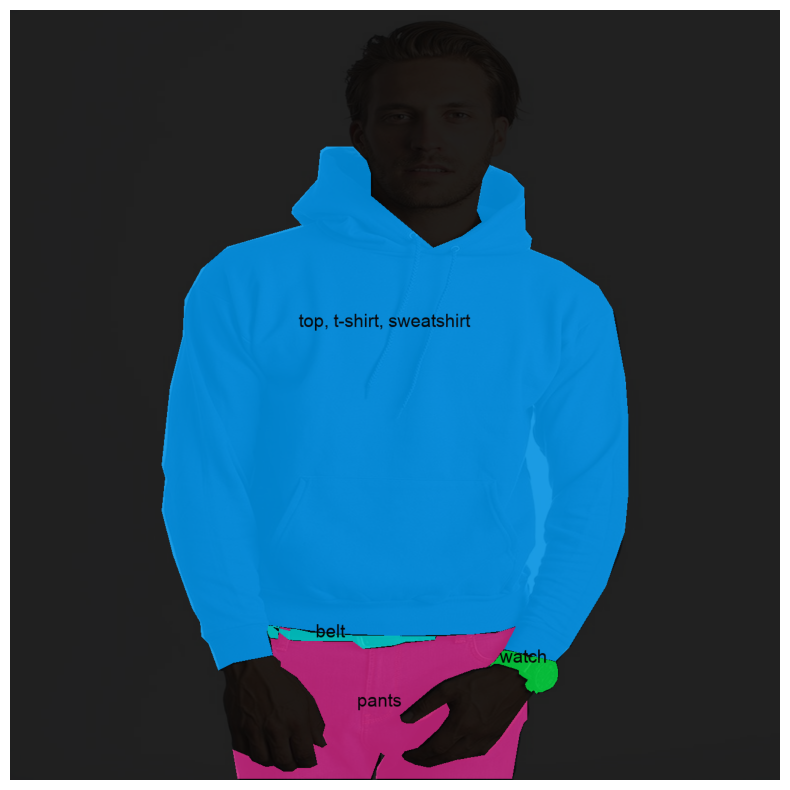

In [113]:

mask_array=generate_mask(annotation_path=annotation_path,show=0)
maskVisualize(np.array(img),mask_array)

In [114]:
# import cv2
# import numpy as np
# from random import randint

# with open(annotation_path, 'r') as f:
#     labels = f.read().splitlines()
# img = cv2.imread(image_path)
# h,w = img.shape[:2]

# for label in labels:
#     class_id, *poly = label.split(' ')
    
#     poly = np.asarray(poly,dtype=np.float16).reshape(-1,2) # Read poly, reshape
#     poly *= [w,h] # Unscale
    
#     cv2.polylines(img, [poly.astype('int')], True, (randint(0,255),randint(0,255),randint(0,255)), 2) # Draw Poly Lines
#     # cv2.fillPoly(img, [poly.astype('int')], (randint(0,255),randint(0,255),randint(0,255)), cv2.LINE_AA) # Draw area

    
#     plt.imshow(img)
#     plt.show()
#     # cv2.imshow('img with poly', img)
#     # cv2.waitKey(0)